In [1]:
import pandas as pd
import numpy as  np
import scipy as sp
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import RegexpStemmer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tag import DefaultTagger
from autocorrect import spell
from textblob import TextBlob
from textblob import Word
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB #binary ise bernoulliNB,gaussaianNB eğer 3 seneçek varsa evet,hayır nötr gibi multinomialNB kullancvaaz
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob,Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline



In [2]:
df=pd.read_csv('restaurant.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [4]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17
...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51


In [5]:
df['language']=df['text'].apply(detect)

In [6]:
df=df[df['language']=='en']

In [7]:
df.stars.value_counts()

5    4227
4    2627
3    1557
1    1051
2     913
Name: stars, dtype: int64

In [8]:
df.loc[df['stars']==3,'sentiment']='notr'
df.loc[df['stars']>3,'sentiment']='positive'
df.loc[df['stars']<3,'sentiment']='negative'

C:\Users\bilal\AppData\Local\Temp\ipykernel_6912\2863207908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['stars']==3,'sentiment']='notr'


In [9]:
df=df[['stars','sentiment','text']]

In [10]:
df['text']=df['text'].str.lower()

In [11]:
df['text']=df['text'].str.replace('\d+','')

C:\Users\bilal\AppData\Local\Temp\ipykernel_6912\3267884281.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('\d+','')


In [12]:
df['text']=df['text'].str.replace('[^\w\s]','')

C:\Users\bilal\AppData\Local\Temp\ipykernel_6912\1436119489.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace('[^\w\s]','')


In [13]:
df['text']=df['text'].str.replace('\n',' ').replace('\r','')

In [14]:
df

,stars,sentiment,text
0,5,positive,after getting food poisoning at the palms hote...
1,4,positive,a feast worthy of gods baccarnal buffet in ca...
2,4,positive,the crab legs are better than the ones at wick...
3,1,negative,not worth it too salty food and expensive this...
4,5,positive,i would give this infinite stars if i could my...
...,...,...,...
10412,5,positive,best buffet ever irma was great served us bett...
10413,4,positive,hollllllyyyy moleyyyy this buffet was one fo...
10414,5,positive,the selection is amazing and all the food is e...
10415,4,positive,one of the best buffets ive had in vegas my on...


In [15]:
stemmer=SnowballStemmer('english')

In [16]:
x=df['text']
y=df['sentiment']

In [17]:
print(x)

0        after getting food poisoning at the palms hote...
1        a feast worthy of gods  baccarnal buffet in ca...
2        the crab legs are better than the ones at wick...
3        not worth it too salty food and expensive this...
4        i would give this infinite stars if i could my...
                               ...                        
10412    best buffet ever irma was great served us bett...
10413    hollllllyyyy moleyyyy   this buffet was one fo...
10414    the selection is amazing and all the food is e...
10415    one of the best buffets ive had in vegas my on...
10416    i got a chance to go to the bacchanal buffett ...
Name: text, Length: 10375, dtype: object


In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [38]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7781,), (2594,), (7781,), (2594,))

In [19]:
vect=CountVectorizer(stop_words='english')
x_train_dtm=vect.fit_transform(x_train)
print(x_train_dtm)
x_test_dtm=vect.transform(x_test)

  (0, 1505)	1
  (0, 2130)	2
  (0, 6552)	1
  (0, 7338)	1
  (0, 13183)	1
  (0, 19061)	1
  (0, 16059)	1
  (0, 6822)	1
  (0, 16928)	1
  (0, 6806)	1
  (0, 17319)	1
  (0, 18254)	1
  (0, 16184)	1
  (0, 2650)	1
  (0, 9216)	1
  (1, 1505)	1
  (1, 2130)	1
  (1, 13183)	1
  (1, 19061)	1
  (1, 18254)	1
  (1, 8497)	1
  (1, 9819)	1
  (1, 9468)	1
  (1, 19194)	1
  (1, 7699)	1
  :	:
  (7779, 10387)	1
  (7779, 18605)	1
  (7779, 3691)	1
  (7779, 6076)	1
  (7780, 1505)	1
  (7780, 2130)	1
  (7780, 18254)	1
  (7780, 9468)	1
  (7780, 7699)	1
  (7780, 12086)	1
  (7780, 3822)	1
  (7780, 9590)	1
  (7780, 4575)	1
  (7780, 2965)	1
  (7780, 16833)	1
  (7780, 12670)	1
  (7780, 456)	1
  (7780, 3805)	1
  (7780, 15175)	1
  (7780, 9657)	1
  (7780, 16337)	1
  (7780, 11714)	1
  (7780, 6668)	1
  (7780, 4119)	1
  (7780, 11551)	1


In [20]:
tf=pd.DataFrame(x_train_dtm.toarray(),columns=vect.get_feature_names())
tf.head()

,__,___,____,_________________________,__________________________,____________________________,_really_,_that_,aa,aaa,...,zooming,zucchini,étoufféeroasted,ベガスに行くと毎回行きます種類も豊富でつつの料理のクオリティも高いです,中国游客别去chinese,価格は少し高めですが満足度が高いです,很多人排隊要有排隊的準備,服务很好价格也实惠,食物的選擇蠻多的也不錯不過牡蠣倒是不怎麼樣,饥饿营销明明里面很多空位还告诉我们要排队个半小时到个小时大厅很暗淡黑灯瞎火的食物一般吧就蟹比较新鲜好吃性价比不太高有点失望they
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
vect=CountVectorizer(ngram_range=(1,2))
x_train_dtm=vect.fit_transform(x_train)
x_train_dtm.shape,x_test_dtm.shape,y_train.shape

((7781, 269695), (2594, 19337), (7781,))

In [22]:
print(vect.get_feature_names()[-50:])

['zinger right', 'zip', 'zip into', 'ziplock', 'ziplock bag', 'ziti', 'ziti and', 'ziti pasta', 'ziti stromboli', 'zitis', 'zitis at', 'zone', 'zone an', 'zone and', 'zone featuring', 'zone going', 'zone in', 'zone not', 'zone since', 'zone stephanie', 'zone the', 'zone they', 'zone what', 'zone you', 'zonecold', 'zonecold honeydew', 'zones', 'zones such', 'zong', 'zong zi', 'zoo', 'zoo and', 'zooming', 'zooming by', 'zucchini', 'zucchini side', 'étoufféeroasted', 'étoufféeroasted fish', 'ベガスに行くと毎回行きます種類も豊富でつつの料理のクオリティも高いです', 'ベガスに行くと毎回行きます種類も豊富でつつの料理のクオリティも高いです 価格は少し高めですが満足度が高いです', '中国游客别去chinese', '中国游客别去chinese tourists', '価格は少し高めですが満足度が高いです', '很多人排隊要有排隊的準備', '服务很好价格也实惠', '服务很好价格也实惠 excellent', '食物的選擇蠻多的也不錯不過牡蠣倒是不怎麼樣', '食物的選擇蠻多的也不錯不過牡蠣倒是不怎麼樣 很多人排隊要有排隊的準備', '饥饿营销明明里面很多空位还告诉我们要排队个半小时到个小时大厅很暗淡黑灯瞎火的食物一般吧就蟹比较新鲜好吃性价比不太高有点失望they', '饥饿营销明明里面很多空位还告诉我们要排队个半小时到个小时大厅很暗淡黑灯瞎火的食物一般吧就蟹比较新鲜好吃性价比不太高有点失望they told']


In [23]:
def tokenize_test(vect):
    x_train_dtm=vect.fit_transform(x_train)
    print('Features: ',x_train_dtm.shape[1])
    x_test_dtm=vect.transform(x_test)
    nb=MultinomialNB()
    nb.fit(x_train_dtm,y_train)
    y_pred_class=nb.predict(x_test_dtm)
    print('Accuracy: ',metrics.accuracy_score(y_test,y_pred_class))

In [24]:
vect=CountVectorizer(ngram_range=(1,2))
tokenize_test(vect)

Features:  269695
Accuracy:  0.7185813415574402


In [25]:
vect=CountVectorizer()
tokenize_test(vect)

Features:  19633
Accuracy:  0.7860447185813415


In [26]:
vect=CountVectorizer(stop_words='english')
tokenize_test(vect)

Features:  19337
Accuracy:  0.774479568234387


In [27]:
print(vect.get_stop_words())

frozenset({'found', 'still', 'none', 'is', 'yourself', 'each', 'front', 'him', 'whom', 'whatever', 'after', 'eight', 'she', 'a', 'anything', 'wherein', 'something', 'yourselves', 'often', 'even', 'myself', 'and', 'every', 'see', 'several', 'his', 'alone', 'being', 'other', 'cant', 'formerly', 'next', 'bill', 'side', 'this', 'with', 'back', 'up', 'amoungst', 'while', 'but', 'else', 'four', 'have', 'anyhow', 'thus', 'anywhere', 'take', 'get', 'top', 'same', 'either', 'show', 'latterly', 'everyone', 'namely', 'became', 'its', 'only', 'into', 'below', 'yours', 'around', 'we', 'hereby', 'anyway', 'in', 'fill', 'until', 'behind', 'some', 'empty', 'onto', 'thru', 'somewhere', 'bottom', 'besides', 'few', 'them', 'cannot', 'seems', 'whence', 'cry', 'from', 'should', 'thereupon', 'ever', 'becoming', 'whereby', 'amongst', 'at', 'anyone', 'an', 'against', 'therefore', 'find', 'hundred', 'detail', 'which', 'therein', 'put', 'many', 'nine', 'rather', 'others', 'of', 'per', 'serious', 'our', 'hereaft

In [28]:
import re
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

In [29]:
def create_wordcloud(text): 
    mask = np.array(Image.open("cloud.png")) 
    stopwords = set(STOPWORDS) 
    wc = WordCloud(background_color='white', mask = mask, max_words=25000, stopwords=stopwords) 
    wc.generate(str(text)) 
    wc.to_file("wc.png") 
    print("Word Cloud Saved Successfully") 
    path="wc.png" 
    display(Image.open(path))

In [30]:
text1=df[df['stars']==1]

Word Cloud Saved Successfully


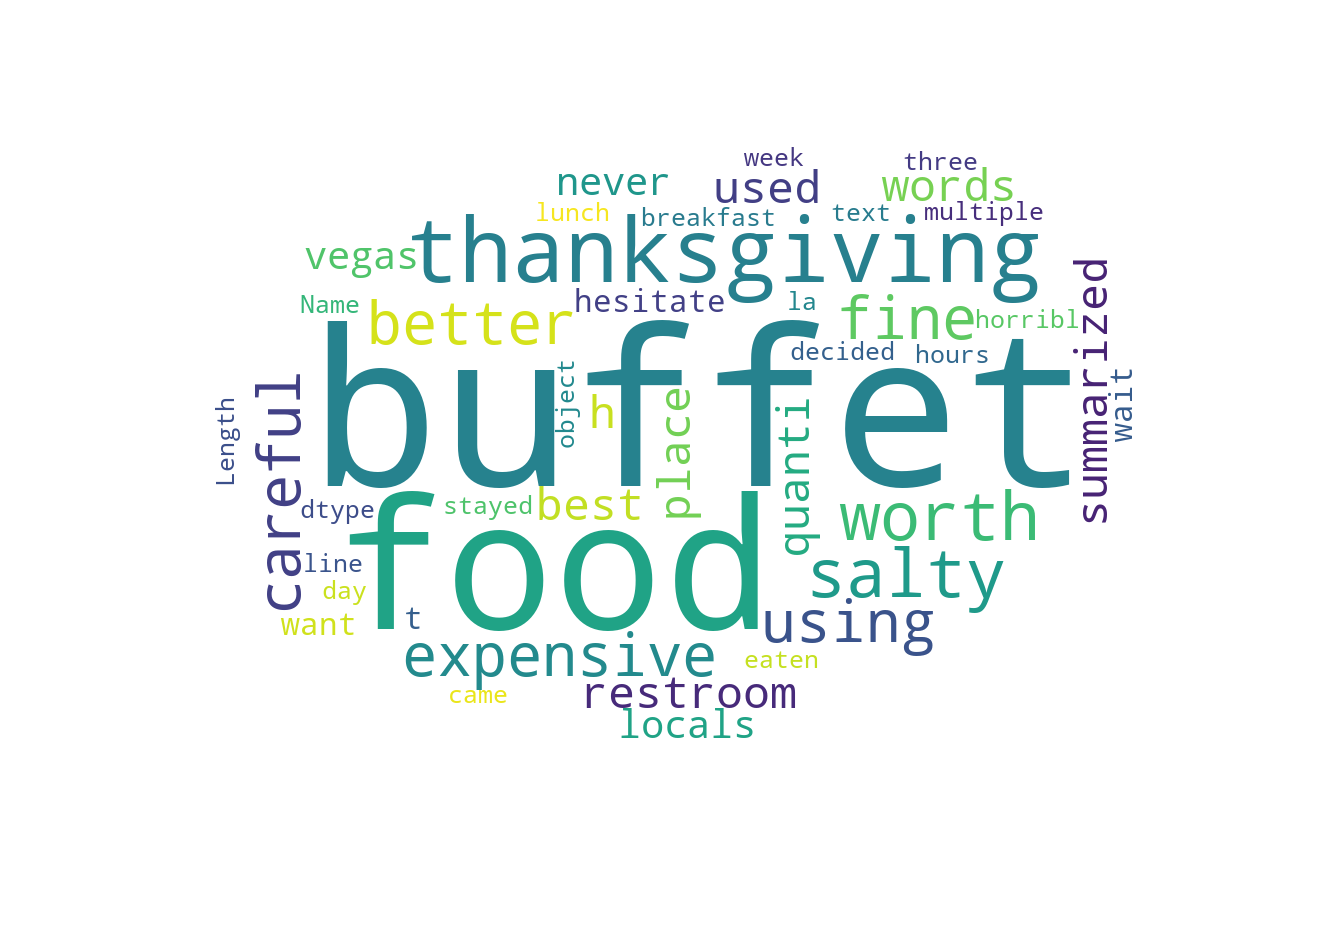

In [31]:
create_wordcloud(text1.text)

In [32]:
text2=df[df['stars']==5]

Word Cloud Saved Successfully


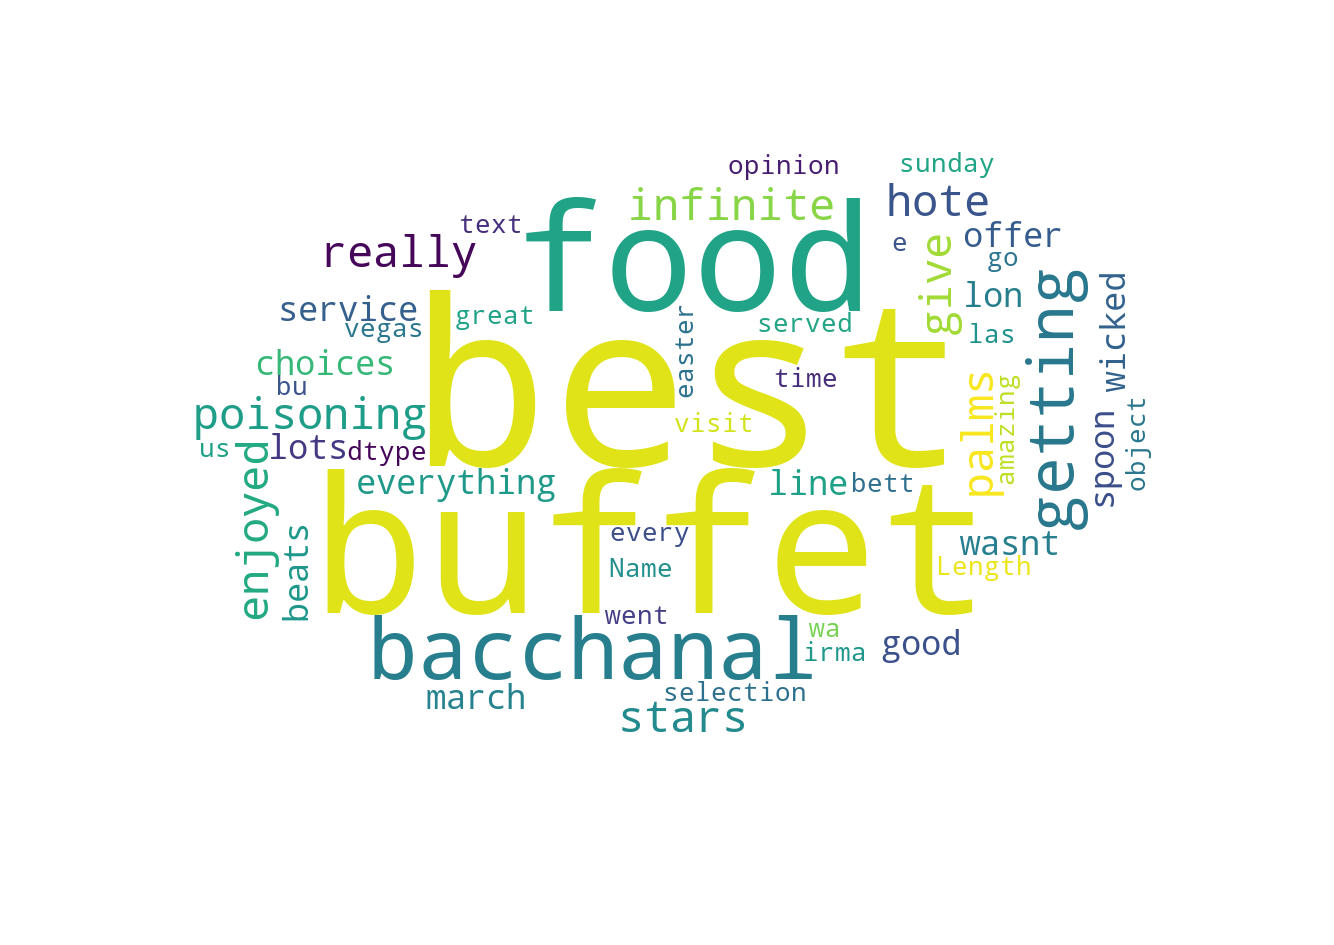

In [33]:
create_wordcloud(text2.text)

In [34]:
vect=TfidfVectorizer(stop_words='english')
dtm=vect.fit_transform(df.text)
features=vect.get_feature_names()
dtm.shape

(10375, 22390)

In [35]:
def summarize(): 
    review_length = 0 
    while review_length < 300: 
        review_id = np.random.randint(0, len(df))
        review_text = str(df.text[review_id])  
        review_length = len(review_text)  
    word_scores={} 
    for word in TextBlob(review_text).words: 
        word = word.lower() 
        if word in features: 
            word_scores[word] = dtm[review_id, features.index(word)] 
    print ('TOP SCORING WORDS:') 
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5] 
    for word, score in top_scores: 
        print (word) 
    print ('\n' + review_text) 

In [36]:
summarize()

TOP SCORING WORDS:
las
buffets
saw
vegas
best

wow  i decided to try them again two years laterthe same disappointing experience  i have to smile sadly at those who think this is the best of las vegasit clearly is not  if you have been to all vegas buffets and still think this is the best then finebut i have been to better ones and have still not tried them all  the first time no shrimp  the second time crab legs that had hardly no crab meat in them  i see other posts saying they have king crab legsno they do not  and caviar  i never saw any  i dont know what time of night these people are going  i went both times during normal dinner hours  i wasnt impressed and wont be returning  the first time i brought relatives from ny  the second time relatives from pa  im done  moving on to the m the aria the wynn etc
